In [3]:
import numpy as np
import matplotlib.pyplot as plt
# import util-fns

plt.rcParams['text.usetex'] =  True

# Homework #2
Mangan, Shmoolik, and Uri Alon. "Structure and function of the feed-forward loop network motif." Proceedings of the National Academy of Sciences 100.21 (2003): 11980-11985.

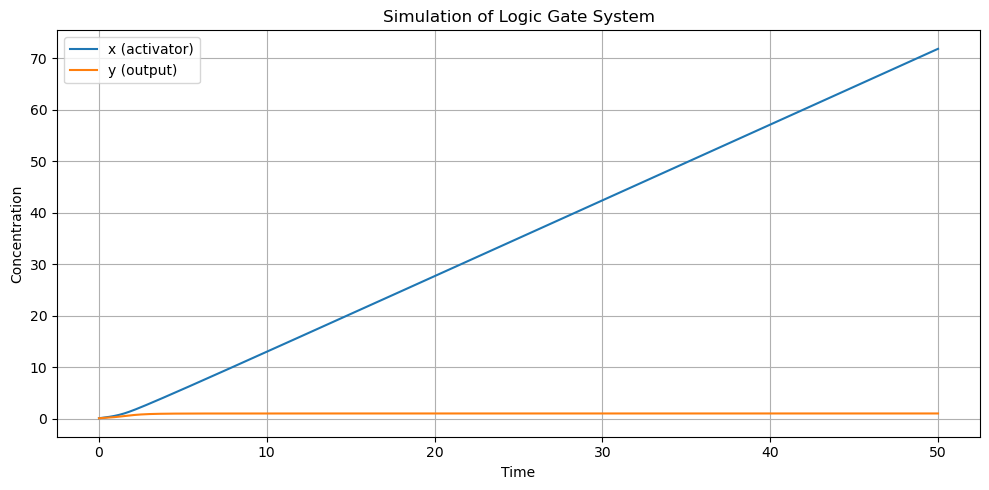

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants for regulation type
act = 1
rep = 0

# Regulation function
def f(u, K, H, reg):
    if reg == act or reg == 1:
        return ((u/K)**H)/(1+(u/K)**H)
    if reg == rep or reg == 0:
        return 1/(1+(u/K)**H)

# Gate function
def Gate(gatename, x1, Kxz, y1, Kyz, H, regX, regY):
    if gatename == 'AND':
        return f(x1, Kxz, H, regX) * f(y1, Kyz, H, regY)
    
    if gatename == 'OR':
        def fc(u, Ku, v, Kv, reg):
            if reg == 1 or reg == act:
                return (u/Ku)**H / (1 + (u/Ku)**H + (v/Kv)**H)
            if reg == 0 or reg == rep:
                return 1 / (1 + (u/Ku)**H + (v/Kv)**H)
        
        return fc(x1, Kxz, y1, Kyz, regX) + fc(y1, Kyz, x1, Kxz, regY)

# Parameters
By = 0.5
Cy = 2.0
Ay = 1.0

Bz = 0.3
Cz = 1.5
Az = 1.0

Kxy = 1.0
Kxz = 1.0
Kyz = 1.0

H = 2.0

regX = act
regY = rep

# System of ODEs
def system(t, q, gatename):
    x1, y1 = q  # Rename to match Gate usage
    
    ydot = By + Cy * f(x1, Kxy, H, regX) - Ay * y1
    zdot = Bz + Cz * Gate(gatename, x1, Kxz, y1, Kyz, H, regX, regY) - Az * y1  # Using y1 instead of z1

    return [ydot, zdot]

# Initial conditions
q0 = [0.1, 0.1]  # Initial values for x and y

# Time span
t_span = (0, 50)
t_eval = np.linspace(*t_span, 500)

# Solve the system
sol = solve_ivp(system, t_span, q0, args=('AND',), t_eval=t_eval)

# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label='x (activator)')
plt.plot(sol.t, sol.y[1], label='y (output)')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Simulation of Logic Gate System')
plt.grid(True)
plt.tight_layout()
plt.show()
